In [ ]:
!git clone https://github.com/sinbaramDL/dacon-credit-card-defaults-detection

fatal: destination path 'dacon-credit-card-defaults-detection' already exists and is not an empty directory.


In [ ]:
cd /content/dacon-credit-card-defaults-detection

/content/dacon-credit-card-defaults-detection


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")

# 한글 사용 설정 
plt.rcParams['axes.unicode_minus'] = False

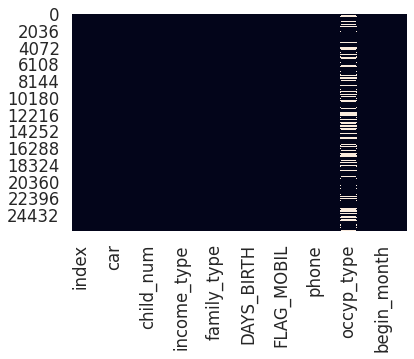

In [ ]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")
sns.heatmap(train.isnull(), cbar=False)

In [ ]:
train = train.drop(["occyp_type","index"], axis = 1)
test =  test.drop(["occyp_type","index"], axis = 1)
print(train.info())
train.head()

In [ ]:
unique_len = train.apply(lambda x : len(x.unique()))
group_1, group_2 = unique_len[unique_len <= 10].index, unique_len[unique_len > 10].index
print(group_1.shape, group_2.shape)

(14,) (4,)


In [ ]:
def plot_nominal(header, ax):
  uniq = np.sort(train[header].unique())
  x_axis = np.arange(len(uniq))
  ax.set_xticks(x_axis) 
  ax.set_xticklabels(uniq, fontsize=12)
  ax.set_title(header)
  credit_0 = train.loc[train['credit'] == 0.0]
  credit_1 = train.loc[train['credit'] == 1.0]
  credit_2 = train.loc[train['credit'] == 2.0]
  ax.bar(x_axis, [len(credit_0.loc[credit_0[header]==inst]) for inst in uniq], color='red', label='credit=0')
  ax.bar(x_axis, [len(credit_1.loc[credit_1[header]==inst]) for inst in uniq], color='blue', label='credit=1', bottom=[len(credit_0.loc[credit_0[header]==inst]) for inst in uniq])
  ax.bar(x_axis, [len(credit_2.loc[credit_2[header]==inst]) for inst in uniq], color='purple', label='credit=2', bottom=[len(credit_1.loc[credit_1[header]==inst]) for inst in uniq])
  
def plot_numeric(header, ax):
  uniq = train[header].unique()
  x_axis = np.arange(len(uniq))
  credit_0 = train.loc[train['credit'] == 0.0]
  credit_1 = train.loc[train['credit'] == 1.0]
  credit_2 = train.loc[train['credit'] == 2.0]
  ax.set_title(header)
  ax.bar(x_axis, [len(credit_0.loc[credit_0[header]==inst]) for inst in uniq], color='red', label='credit=0')
  ax.bar(x_axis, [len(credit_1.loc[credit_1[header]==inst]) for inst in uniq], color='blue', label='credit=1', bottom=[len(credit_0.loc[credit_0[header]==inst]) for inst in uniq])
  ax.bar(x_axis, [len(credit_2.loc[credit_2[header]==inst]) for inst in uniq], color='cyan', label='credit=2', bottom=[len(credit_1.loc[credit_1[header]==inst]) for inst in uniq])

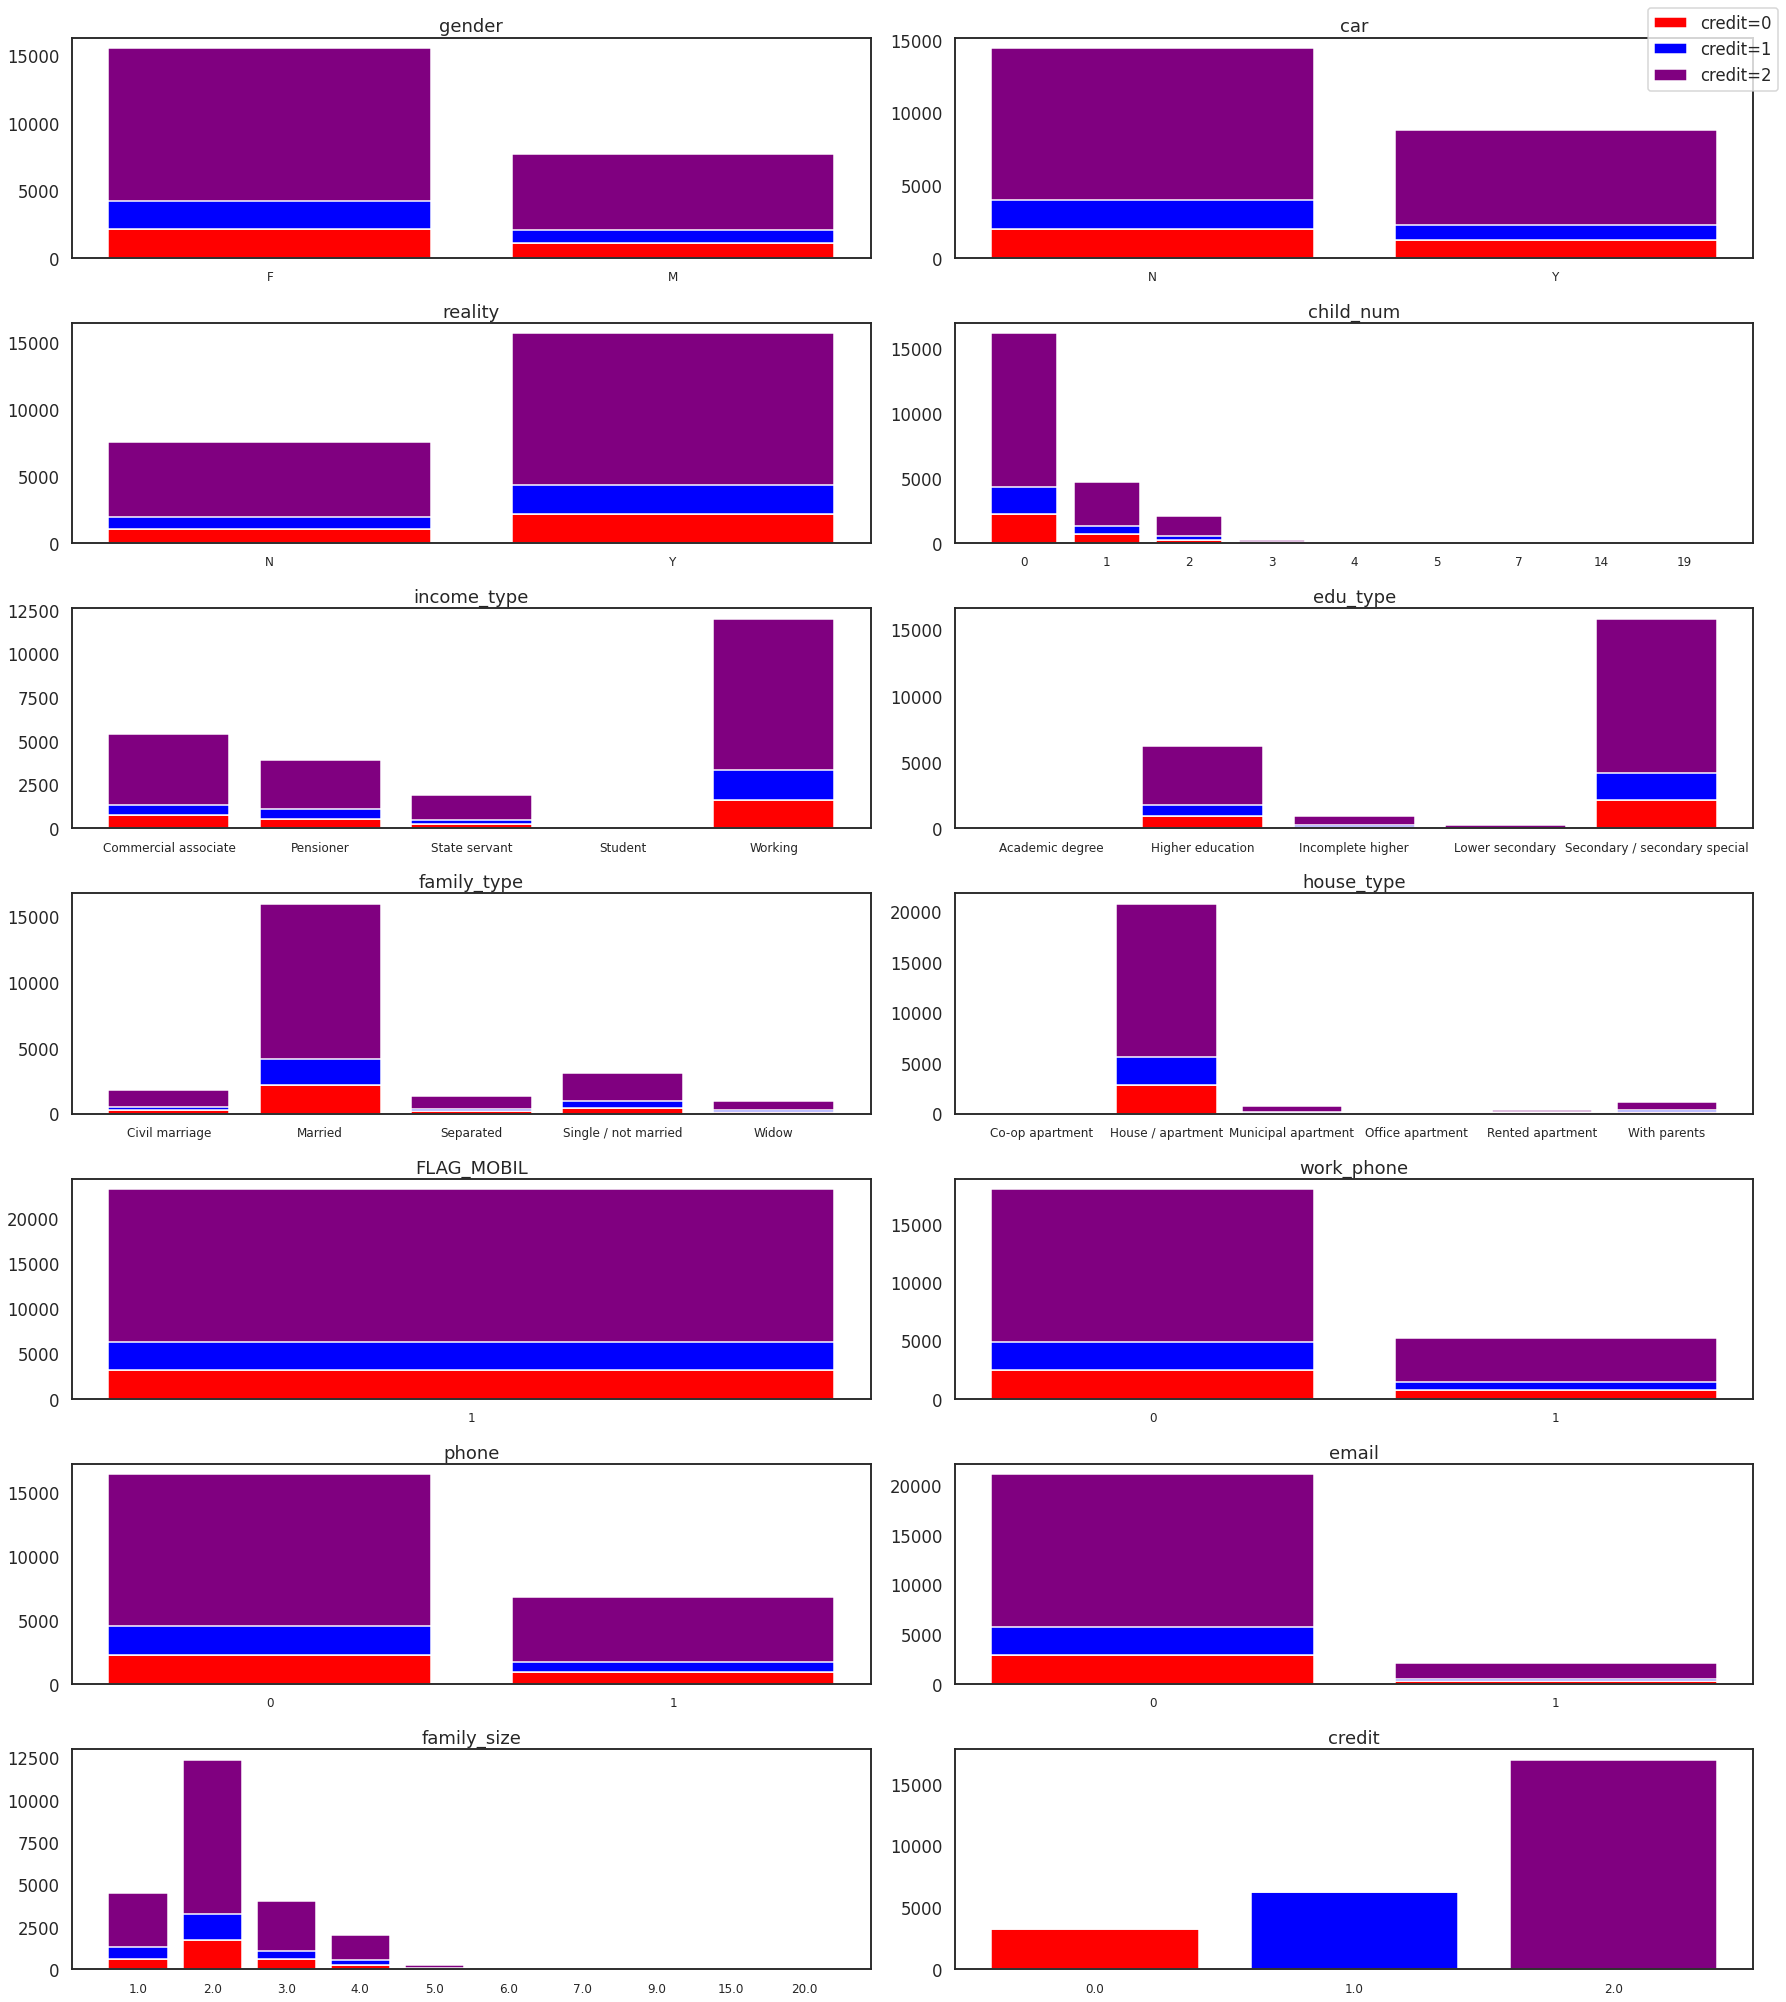

In [ ]:
fig, axs = plt.subplots(7, 2)
fig.set_figwidth(25)
fig.set_figheight(28)
for i in range(7):
  for j in range(2):
    if (i * 2 + j < 14):
      plot_nominal(train[group_1].columns[i * 2 + j], axs[i][j])
handles, labels = axs[6][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def make_bin(header, n, negative=True):
    train[header]= -train[header] if negative else train[header]
    count, bin_dividers = np.histogram(train[header], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[header]=pd.cut(x=train[header], bins=bin_dividers, labels=bin_names, include_lowest=True)
    train[header]=label_encoder.fit_transform(train[header])

make_bin('income_total', n=7, negative=False)
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,0,Commercial associate,Higher education,Married,Municipal apartment,3,1,1,0,0,0,2.0,0,1.0
1,F,N,Y,1,0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,2,1,1,0,0,1,3.0,0,1.0
2,M,Y,Y,0,1,Working,Higher education,Married,House / apartment,6,1,1,0,1,0,2.0,1,2.0
3,F,N,Y,0,0,Commercial associate,Secondary / secondary special,Married,House / apartment,4,1,1,0,1,0,2.0,2,0.0
4,F,Y,Y,0,0,State servant,Higher education,Married,House / apartment,4,1,1,0,0,0,2.0,1,2.0


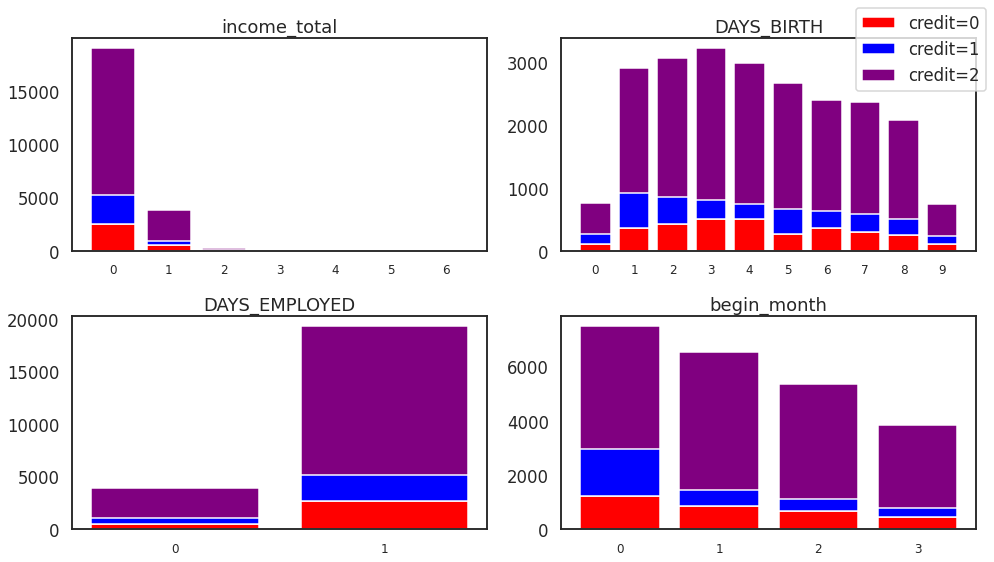

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)
for i in range(2):
  for j in range(2):
      plot_nominal(train[group_2].columns[i * 2 + j], axs[i][j])
handles, labels = axs[1][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()

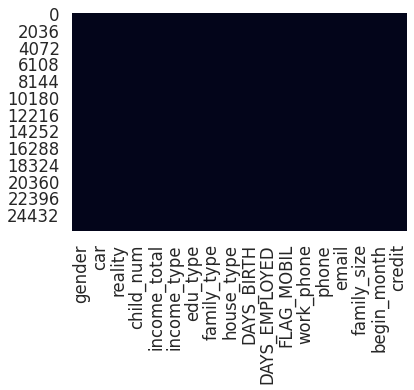